# Harmonization Parameters Finder

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Read Data

In [8]:
def read_sensor_data(file_prefix, num_sensors=15,api=False):
    
    if api:
        # file_prefix = 'tsi_v3_api/telemetry_outputs/Raw_Edited.csv'
        df = pd.read_csv(file_prefix)
        # Group by 'model' and create a dictionary of DataFrames
        model_dfs = {}
        sensor_dataframes = []
        for model, group in df.groupby('friendly_name'):
            model_dfs[model] = group

        rename_dict = {
                'PM1.0 (ug/m3)': 'PM 1.0',
                'PM2.5 (ug/m3)': 'PM 2.5',
                'PM4.0 (ug/m3)': 'PM 4.0',
                'PM10 (ug/m3)': 'PM 10',
                'PM0.5 NC (#/cm3)': 'NC 0.5',
                'PM1.0 NC (#/cm3)': 'NC 1.0',
                'PM2.5 NC (#/cm3)': 'NC 2.5',
                'PM4.0 NC (#/cm3)': 'NC 4.0',
                'PM10 NC (#/cm3)': 'NC 10',
                'Typical Particle Size (um)': 'Typical Particle Size',
                'Temperature (Celsius)': 'Temperature',
                'Relative Humidity (%)': 'Relative Humidity',
                'timestamp' : 'Timestamp'
        }
        # Access individual DataFrames
        for keys in model_dfs.keys():
            # print(f"DataFrame for Model {model}:")
            # print(model_df)
                
            model_dfs[keys] = model_dfs[keys].rename(columns=rename_dict)
            # print("\n")
            sensor_dataframes.append(model_dfs[keys])
        return sensor_dataframes
        
    else:
        sensor_dataframes = []
        for i in range(1, num_sensors + 1):
            filename = f'{file_prefix}{i:02d}.csv'
            sensor_df = pd.read_csv(filename)
            sensor_dataframes.append(sensor_df)
        return sensor_dataframes

# sensor_dataframes = read_sensor_data('data/Indoor')

In [9]:
def read_sensor_data(file_prefix, num_sensors=1):
    sensor_dataframes = []
    for i in range(1, num_sensors + 1):
        filename = f'../harmonization/outdoor_data/{file_prefix}{i:02d}.csv'
        sensor_df = pd.read_csv(filename)
        sensor_dataframes.append(sensor_df)
    return sensor_dataframes

sensor_dataframes = read_sensor_data('Indoor')

## Clean Data

In [10]:
# def create_units_dict(df):
#     units_dict = {}
#     for column in df.columns:
#         units_dict[column] = df.loc[0, column]
#     return units_dict

# units_dict = create_units_dict(sensor_dataframes[0])

units_dict = {'Timestamp': 'UTC',
 'Timestamp (Local)': 'UTC-05:00',
 'PM 1.0': 'ug/m3',
 'PM 2.5': 'ug/m3',
 'Applied PM 2.5 Custom Calibration Setting - Multiplication Factor': None,
 'Applied PM 2.5 Custom Calibration Setting - Offset': None,
 'PM 4.0': 'ug/m3',
 'PM 10': 'ug/m3',
 'Applied PM 10 Custom Calibration Setting - Multiplication Factor': None,
 'Applied PM 10 Custom Calibration Setting - Offset': None,
 'NC 0.5': '#/cm3',
 'NC 1.0': '#/cm3',
 'NC 2.5': '#/cm3',
 'NC 4.0': '#/cm3',
 'NC 10': '#/cm3',
 'PM Sensor Error Status': None,
 'CO2': 'ppm',
 'Applied CO2 Custom Calibration Setting - Multiplication Factor': None,
 'Applied CO2 Custom Calibration Setting - Offset': None,
 'CO2 Sensor Error Status': None,
 'CH2O': 'ppb',
 'Applied CH2O Custom Calibration Setting - Multiplication Factor': None,
 'Applied CH2O Custom Calibration Setting - Offset': None,
 'CH2O Sensor Error Status': None,
 'Barometric Pressure': 'inHg',
 'Applied Barometric Pressure Custom Calibration Setting - Offset': None,
 'Barometric Sensor Error Status': None,
 'CO': 'ppm',
 'Applied CO Custom Calibration Setting - Multiplication Factor': None,
 'Applied CO Custom Calibration Setting - Offset': None,
 'CO Sensor Error Status': None,
 'SO2': 'ppb',
 'Applied SO2 Custom Calibration Setting - Multiplication Factor': None,
 'Applied SO2 Custom Calibration Setting - Offset': None,
 'SO2 Sensor Error Status': None,
 'O3': 'ppb',
 'Applied O3 Custom Calibration Setting - Multiplication Factor': None,
 'Applied O3 Custom Calibration Setting - Offset': None,
 'O3 Sensor Error Status': None,
 'NO2': 'ppb',
 'Applied NO2 Custom Calibration Setting - Multiplication Factor': None,
 'Applied NO2 Custom Calibration Setting - Offset': None,
 'NO2 Sensor Error Status': None,
 'VOC tVOC measurement': 'mg/m3',
 'Applied TVOC Custom Calibration Setting - Multiplication Factor': None,
 'Applied TVOC Custom Calibration Setting - Offset': None,
 'VOC Ethanol': 'ppb',
 'VOC Sensor Error Status': None,
 'Temperature': 'Fahrenheit',
 'Applied Temperature Custom Calibration Setting - Offset': 'Celsius',
 'Relative Humidity': '%',
 'Applied Relative Humidity Custom Calibration Setting - Offset': None,
 'Temperature/Humidity Sensor Error Status': None,
 'Device Status': None}

In [11]:
# Sensor names for mapping
sensor_names = ['sensor01']
def clean_sensor_dataframes(sensor_dataframes):
    numeric_columns = ['PM 1.0', 'PM 2.5', 'PM 4.0', 'PM 10',
                       'NC 0.5', 'NC 1.0', 'NC 2.5', 'NC 10',
                       'CO2', 'Barometric Pressure', 'VOC tVOC measurement',
                       'VOC Ethanol', 'Temperature', 'Relative Humidity']
    cleaned_dataframes = []
    
    columns_not_present = list(set(numeric_columns) - set(sensor_dataframes[0].columns.to_list()))
    columns_present = [x for x in numeric_columns if x not in columns_not_present]

    print(f'Columns not present in the Dataframe: {columns_not_present}')

    for sensor_df in sensor_dataframes:
        # remove header
        sensor_df = sensor_df.iloc[1:]
        # Sort by 'Timestamp'
        sensor_df = sensor_df.sort_values(by=['Timestamp']).reset_index()
        # Change 'Timestamp' to date format
        sensor_df['Timestamp'] = pd.to_datetime(sensor_df['Timestamp'])
        # Convert specified columns to numeric
        set(columns_present) - set(sensor_dataframes[0].columns.to_list())
        
        sensor_df[columns_present] = sensor_df[columns_present].apply(pd.to_numeric, errors='coerce')
        # Append the cleaned DataFrame to the list
        cleaned_dataframes.append(sensor_df)
    return cleaned_dataframes
cleaned_sensor_dataframes = clean_sensor_dataframes(sensor_dataframes)

Columns not present in the Dataframe: []


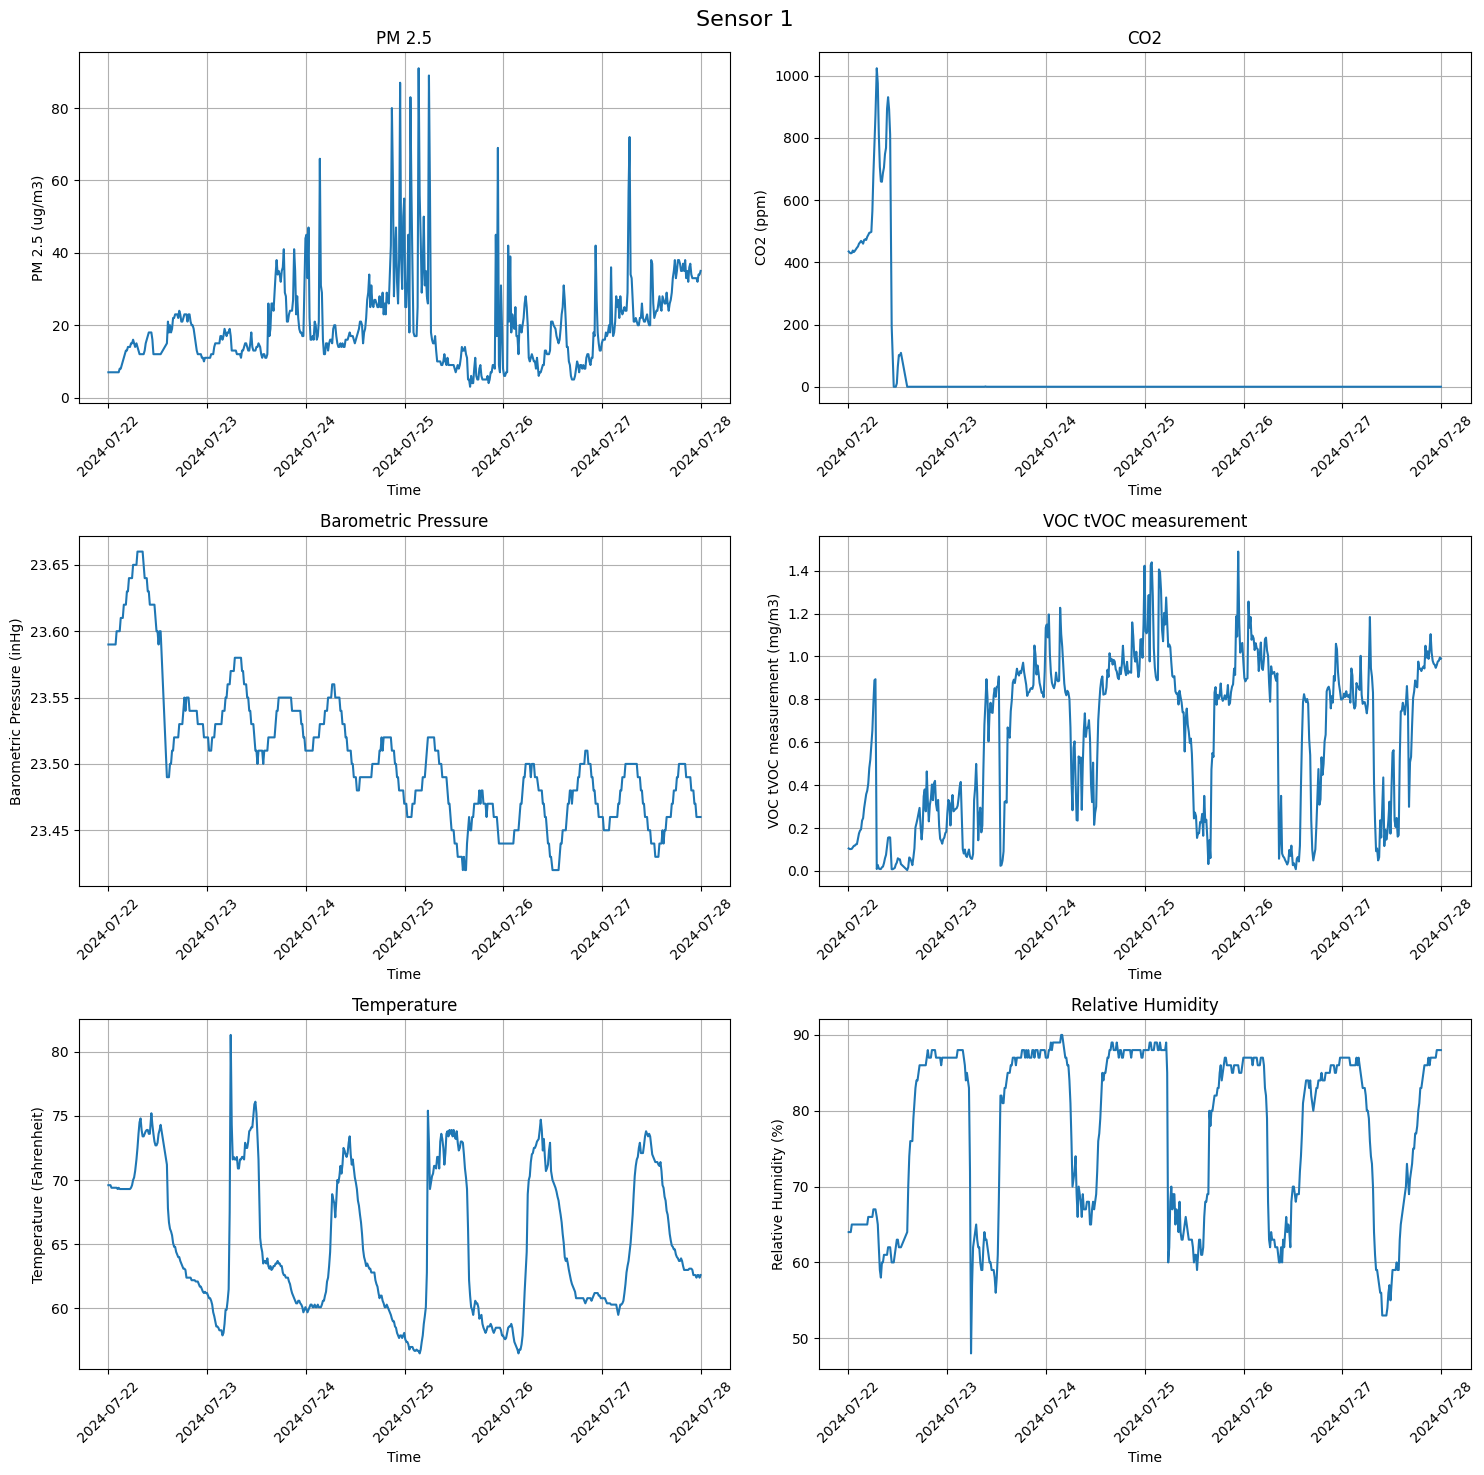

In [10]:
# Define columns to plot
columns_to_plot = ['PM 2.5', 'CO2', 'Barometric Pressure', 'VOC tVOC measurement', 'Temperature', 'Relative Humidity']
columns_not_present = list(set(columns_to_plot) - set(sensor_dataframes[0].columns.to_list()))
working_columns = [x for x in columns_to_plot if x not in columns_not_present]

num_plots_per_row = 2
for sensor_num, df in enumerate(cleaned_sensor_dataframes[:1]):
    num_columns = len(working_columns)
    num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row  # Ceiling division
    fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
    fig.suptitle(f"Sensor {sensor_num + 1}", fontsize=16)

    for i, column in enumerate(working_columns):
        row = i // num_plots_per_row
        col = i % num_plots_per_row
        axs[row, col].plot(df['Timestamp'], df[column])
        axs[row, col].set_title(column)
        axs[row, col].set_xlabel('Time')
        axs[row, col].set_ylabel(f'{column} ({units_dict[column]})')
        axs[row, col].grid(True)
        axs[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [11]:
sensor01_index = 0  

# Extract the dataframe for sensor01
df_sensor01 = cleaned_sensor_dataframes[sensor01_index]

# Apply the transformation to PM 2.5 column
df_sensor01['PM 2.5'] = df_sensor01['PM 2.5'] * 2.5080774157549155 - 0.05197842707478273
df_sensor01['Temperature'] = df_sensor01['Temperature'] * 0.9653950492082032 + 2.461005745042783
df_sensor01['Relative Humidity'] = df_sensor01['Relative Humidity'] * 0.969444039967639 + 1.905022168921839

# Update the dataframe in the list
cleaned_sensor_dataframes[sensor01_index] = df_sensor01

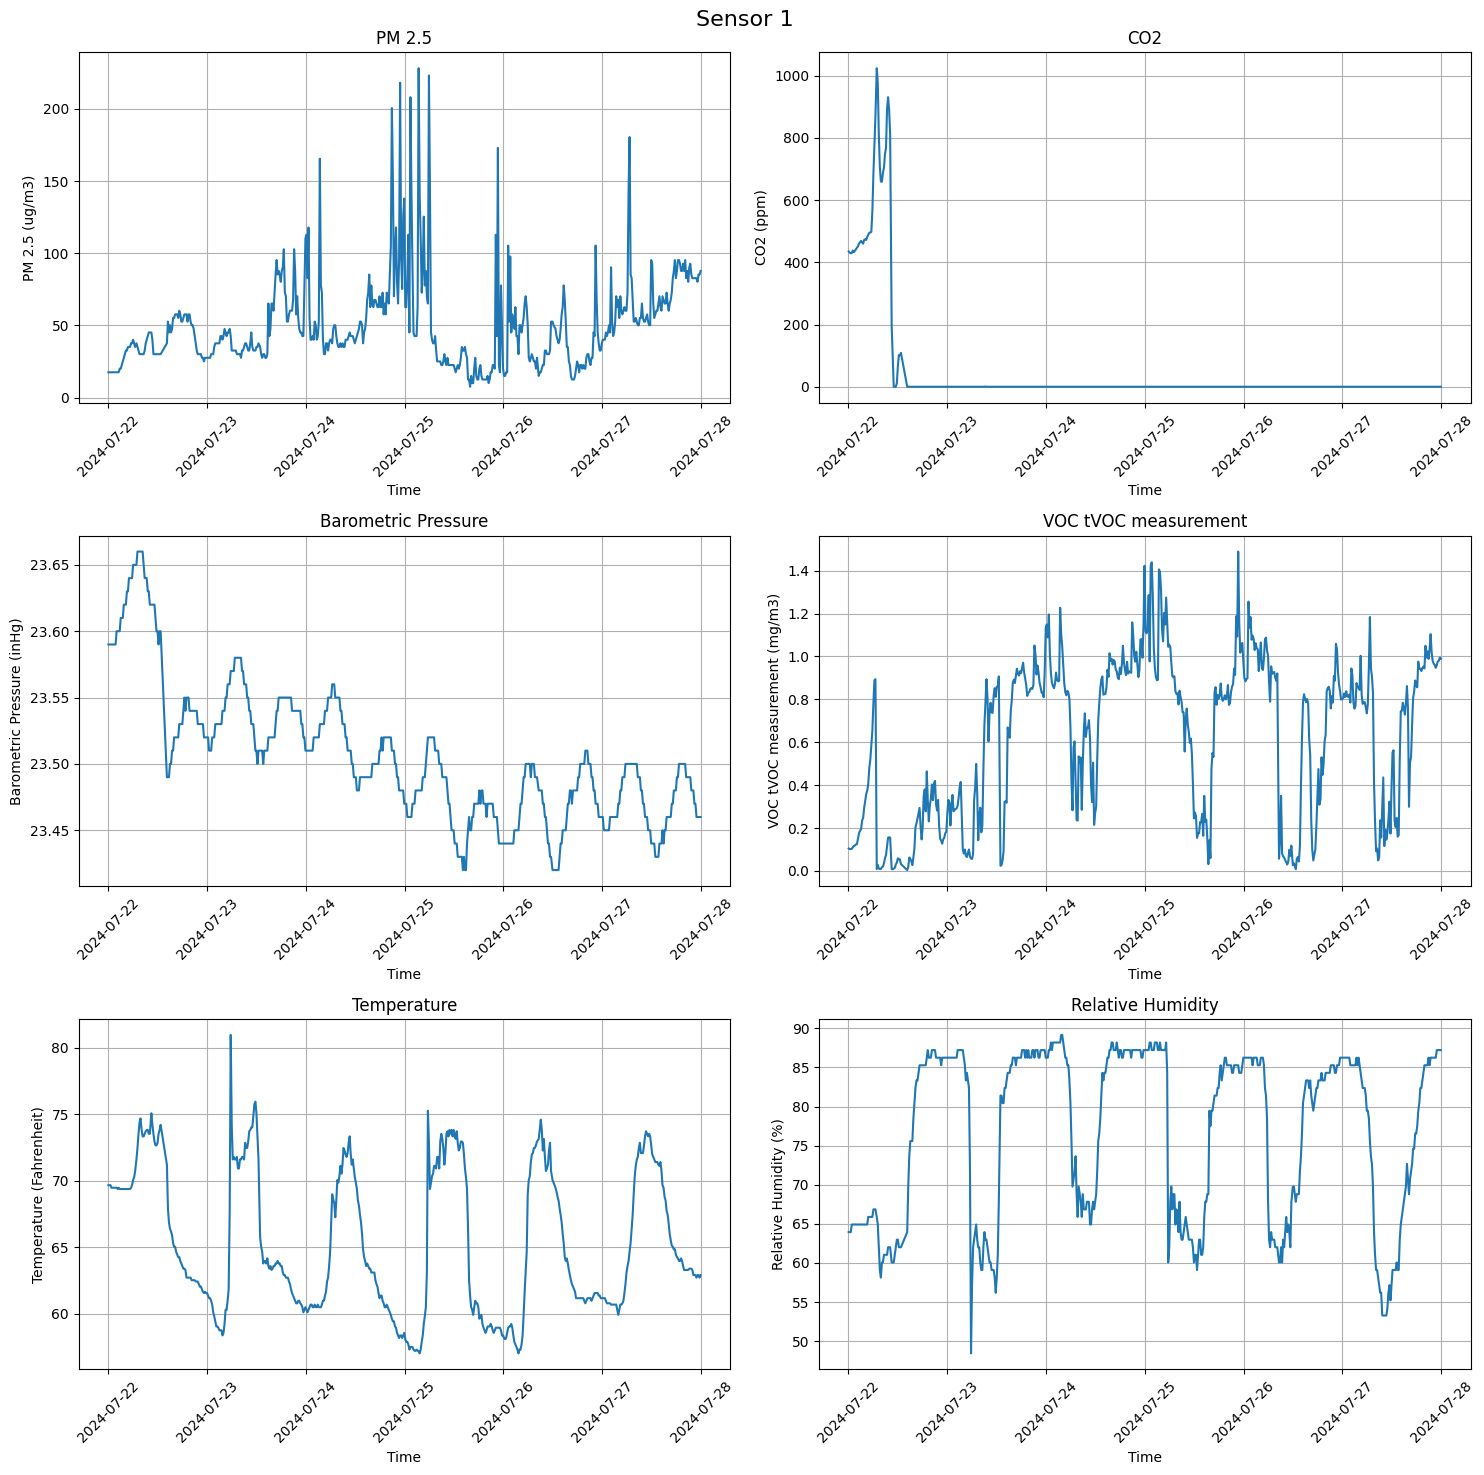

In [12]:
# Define columns to plot
columns_to_plot = ['PM 2.5', 'CO2', 'Barometric Pressure', 'VOC tVOC measurement', 'Temperature', 'Relative Humidity']
columns_not_present = list(set(columns_to_plot) - set(sensor_dataframes[0].columns.to_list()))
working_columns = [x for x in columns_to_plot if x not in columns_not_present]

num_plots_per_row = 2
for sensor_num, df in enumerate(cleaned_sensor_dataframes[:1]):
    num_columns = len(working_columns)
    num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row  # Ceiling division
    fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
    fig.suptitle(f"Sensor {sensor_num + 1}", fontsize=16)

    for i, column in enumerate(working_columns):
        row = i // num_plots_per_row
        col = i % num_plots_per_row
        axs[row, col].plot(df['Timestamp'], df[column])
        axs[row, col].set_title(column)
        axs[row, col].set_xlabel('Time')
        axs[row, col].set_ylabel(f'{column} ({units_dict[column]})')
        axs[row, col].grid(True)
        axs[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [14]:
def read_sensor_data(file_prefix, num_sensors=3):
    sensor_dataframes = []
    for i in range(1, num_sensors + 1):
        filename = f'../harmonization/outdoor_data/{file_prefix}{i:01d}.csv'
        sensor_df = pd.read_csv(filename)
        sensor_dataframes.append(sensor_df)
    return sensor_dataframes

sensor_dataframes_outdoor = read_sensor_data('Outdoor')

In [15]:
# Sensor names for mapping
sensor_names = ['outdoor01', 'outdoor02', 'outdoor03']
def clean_sensor_dataframes_outdoor(sensor_dataframes):
    numeric_columns = ['PM 1.0', 'PM 2.5', 'PM 4.0', 'PM 10',
                       'NC 0.5', 'NC 1.0', 'NC 2.5', 'NC 10',
                       'Temperature', 'Relative Humidity']
    cleaned_dataframes = []
    
    columns_not_present = list(set(numeric_columns) - set(sensor_dataframes[0].columns.to_list()))
    columns_present = [x for x in numeric_columns if x not in columns_not_present]

    print(f'Columns not present in the Dataframe: {columns_not_present}')

    for sensor_df in sensor_dataframes:
        # remove header
        sensor_df = sensor_df.iloc[1:]
        # Sort by 'Timestamp'
        sensor_df = sensor_df.sort_values(by=['Timestamp']).reset_index()
        # Change 'Timestamp' to date format
        sensor_df['Timestamp'] = pd.to_datetime(sensor_df['Timestamp'])
        # Convert specified columns to numeric
        set(columns_present) - set(sensor_dataframes[0].columns.to_list())
        
        sensor_df[columns_present] = sensor_df[columns_present].apply(pd.to_numeric, errors='coerce')
        # Append the cleaned DataFrame to the list
        cleaned_dataframes.append(sensor_df)
    return cleaned_dataframes
cleaned_sensor_dataframes_outdoor = clean_sensor_dataframes_outdoor(sensor_dataframes_outdoor)

Columns not present in the Dataframe: []


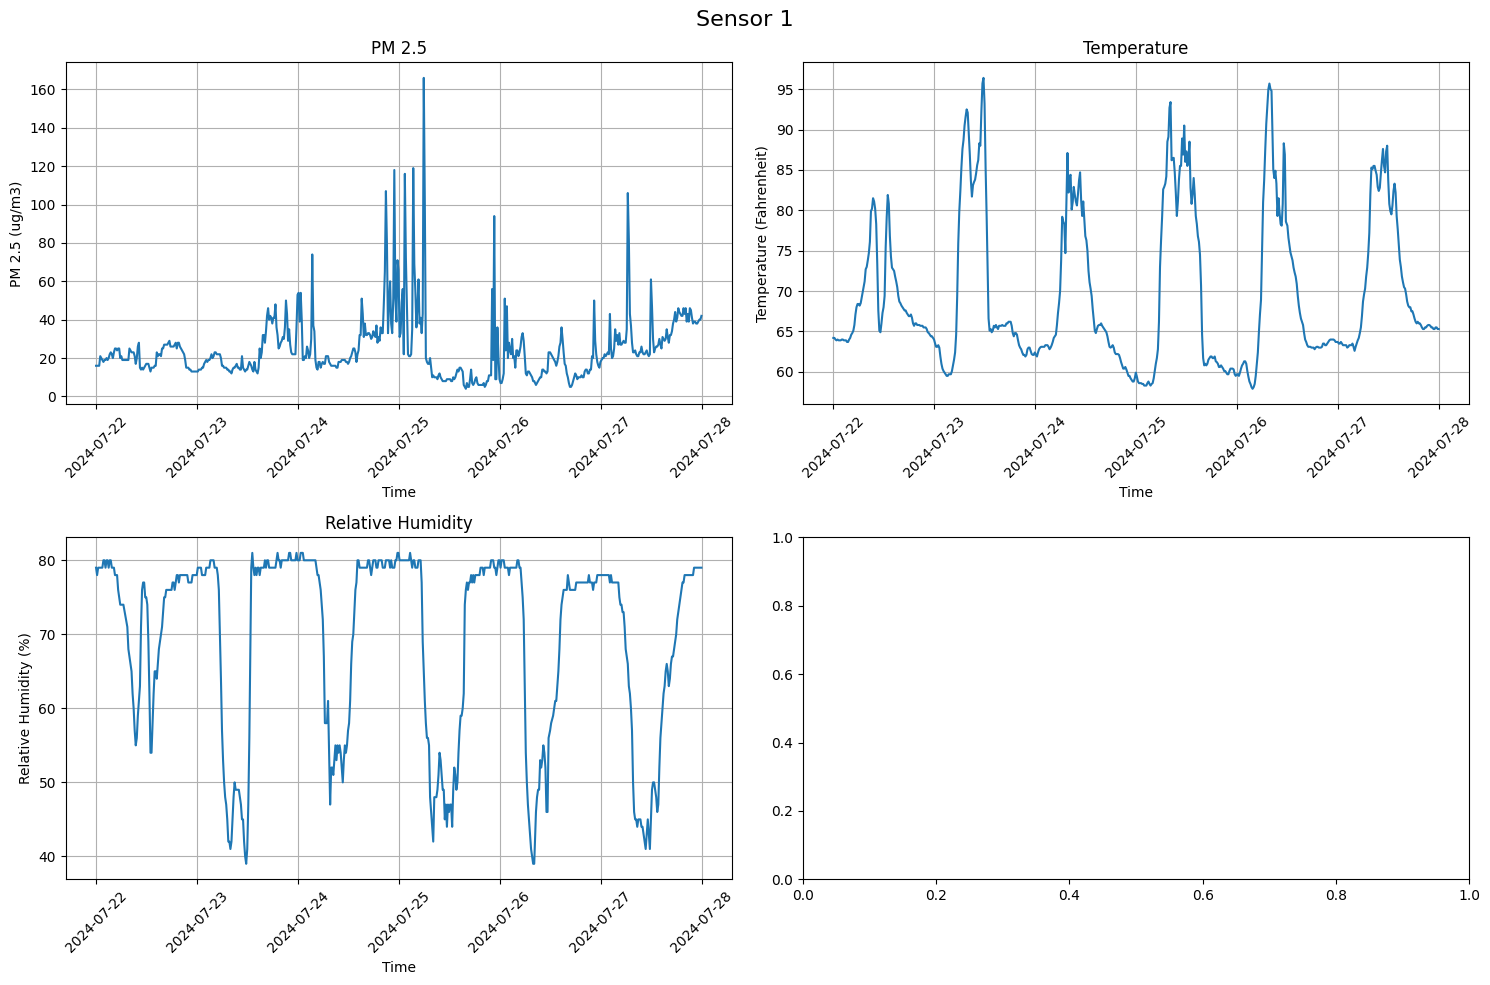

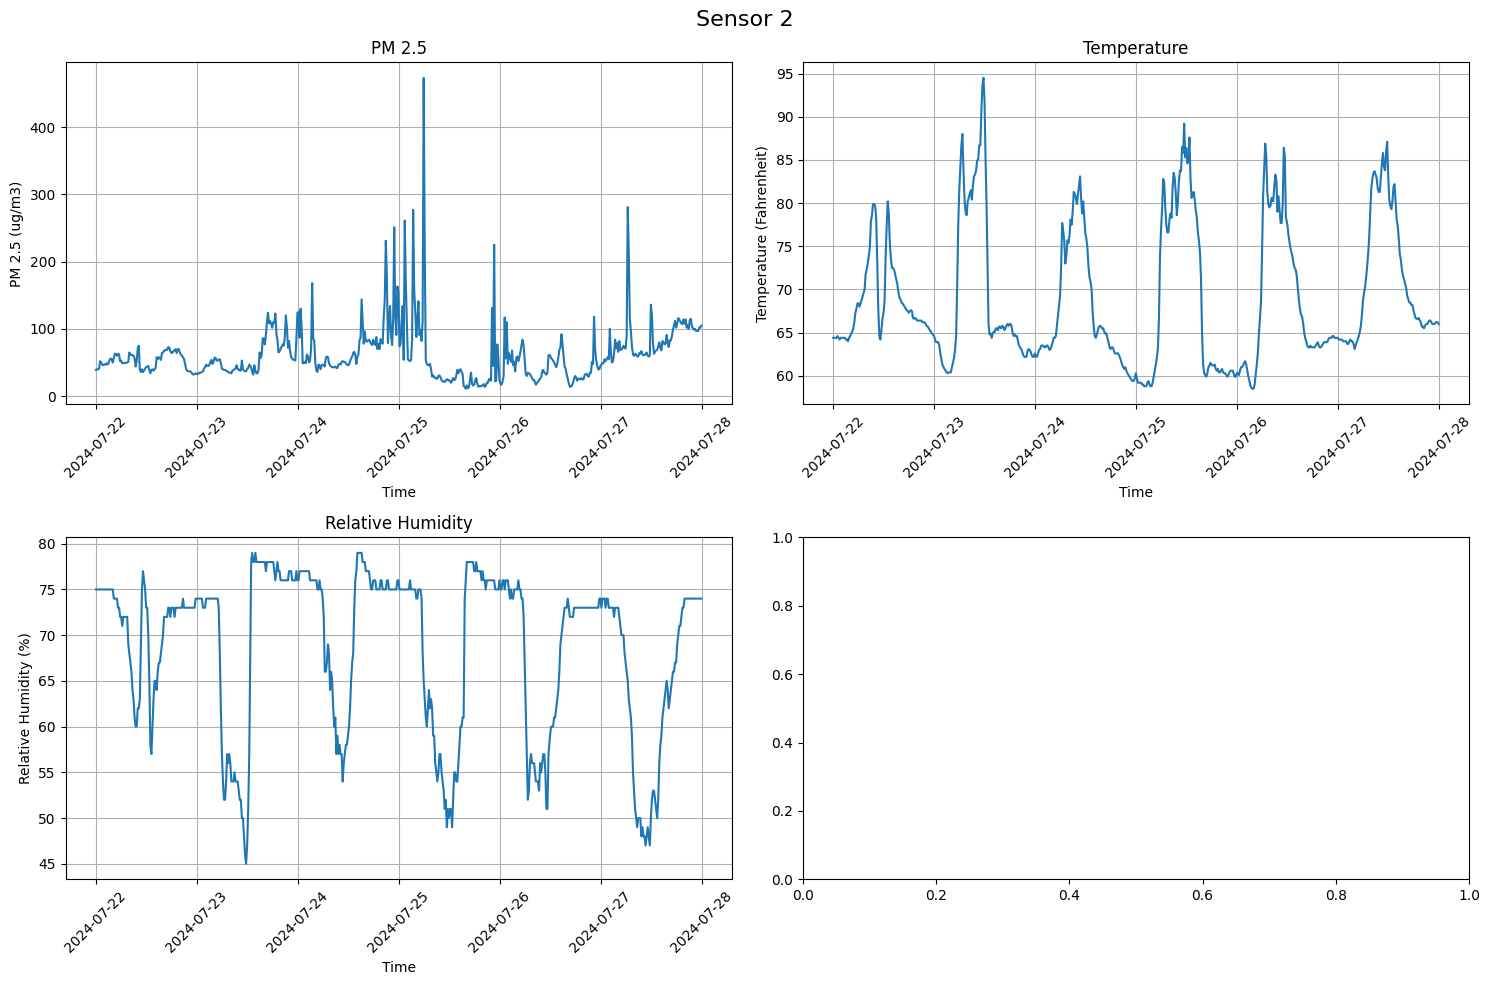

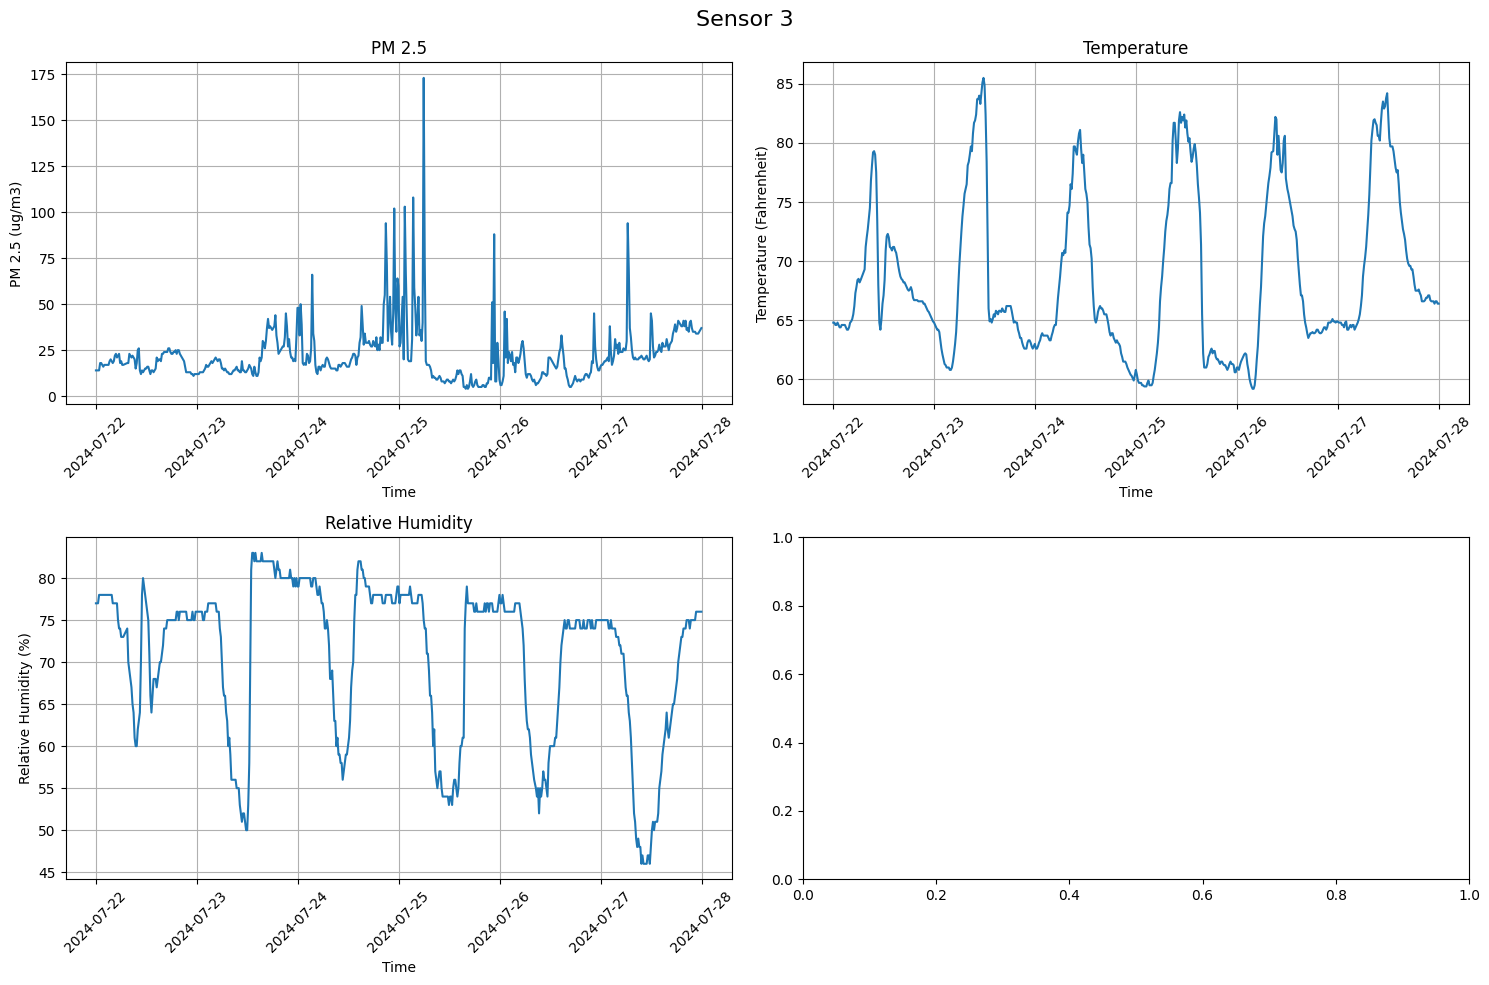

In [15]:
# Define columns to plot
columns_to_plot = ['PM 2.5','Temperature', 'Relative Humidity']
columns_not_present = list(set(columns_to_plot) - set(sensor_dataframes_outdoor[0].columns.to_list()))
working_columns = [x for x in columns_to_plot if x not in columns_not_present]

num_plots_per_row = 2
for sensor_num, df in enumerate(cleaned_sensor_dataframes_outdoor[:3]):
    num_columns = len(working_columns)
    num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row  # Ceiling division
    fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
    fig.suptitle(f"Sensor {sensor_num + 1}", fontsize=16)

    for i, column in enumerate(working_columns):
        row = i // num_plots_per_row
        col = i % num_plots_per_row
        axs[row, col].plot(df['Timestamp'], df[column])
        axs[row, col].set_title(column)
        axs[row, col].set_xlabel('Time')
        axs[row, col].set_ylabel(f'{column} ({units_dict[column]})')
        axs[row, col].grid(True)
        axs[row, col].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

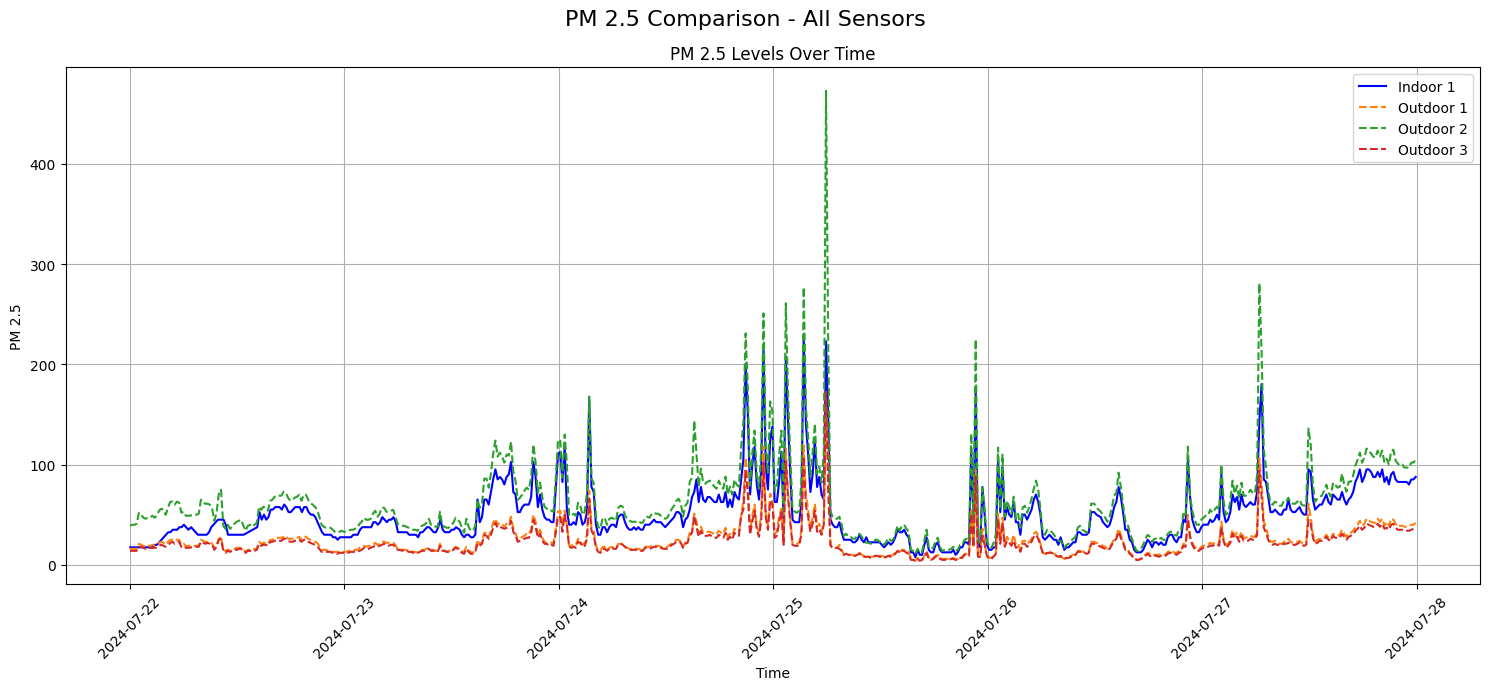

In [16]:
df_indoor = cleaned_sensor_dataframes[0] 

r2_values = []

# Iterate over the outdoor sensors
for i, df_outdoor in enumerate(cleaned_sensor_dataframes_outdoor):
    # Ensure that the dataframes are aligned and drop NaN values
    concatenated_df = pd.concat([df_indoor['PM 2.5'].reset_index(drop=True), 
                                 df_outdoor['PM 2.5'].reset_index(drop=True)], axis=1)
    concatenated_df.columns = [f'PM 2.5_indoor', f'PM 2.5_outdoor{i + 1}']
    
    # Drop rows with NaN values
    concatenated_df.dropna(inplace=True)

    # Calculate R² between the indoor and outdoor sensor
    if not concatenated_df.empty:
        r2_value = concatenated_df.corr().iloc[0, 1]
    else:
        r2_value = float('nan')  # Handle case where no data is available for calculation
    
    r2_values.append((f'indoor1', f'outdoor{i + 1}', r2_value))

# Plot PM 2.5 for all sensors on the same plot
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("PM 2.5 Comparison - All Sensors", fontsize=16)

# Plot the indoor sensor's PM 2.5
ax.plot(df_indoor['Timestamp'], df_indoor['PM 2.5'], label='Indoor 1', linestyle='-', color='blue')

# Plot each outdoor sensor's PM 2.5 with R² values
for i, df_outdoor in enumerate(cleaned_sensor_dataframes_outdoor):
    # Extract the corresponding R² value
    r2_value = r2_values[i][2]
    # Plot the outdoor sensor data
    ax.plot(df_outdoor['Timestamp'], df_outdoor['PM 2.5'], 
            label=f'Outdoor {i + 1}', linestyle='--', color=f'C{i + 1}')

# Customize plot
ax.set_title("PM 2.5 Levels Over Time")
ax.set_xlabel('Time')
ax.set_ylabel('PM 2.5')
ax.legend()
ax.grid(True)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

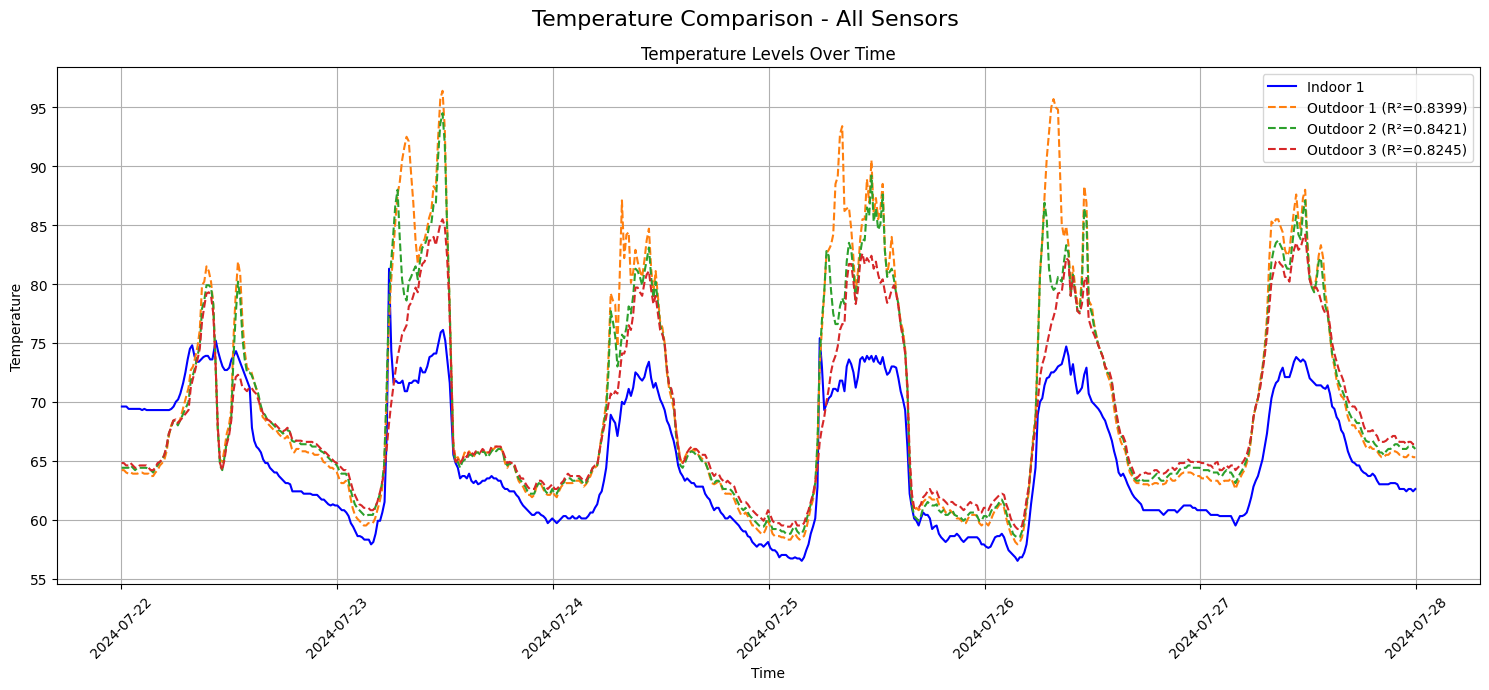

In [60]:
df_indoor = cleaned_sensor_dataframes[0] 

r2_values = []

# Iterate over the outdoor sensors
for i, df_outdoor in enumerate(cleaned_sensor_dataframes_outdoor):
    # Ensure that the dataframes are aligned and drop NaN values
    concatenated_df = pd.concat([df_indoor['Temperature'].reset_index(drop=True), 
                                 df_outdoor['Temperature'].reset_index(drop=True)], axis=1)
    concatenated_df.columns = [f'Temperature_indoor', f'Temperature_outdoor{i + 1}']
    
    # Drop rows with NaN values
    concatenated_df.dropna(inplace=True)

    # Calculate R² between the indoor and outdoor sensor
    if not concatenated_df.empty:
        r2_value = concatenated_df.corr().iloc[0, 1]
    else:
        r2_value = float('nan')  # Handle case where no data is available for calculation
    
    r2_values.append((f'indoor1', f'outdoor{i + 1}', r2_value))

# Plot PM 2.5 for all sensors on the same plot
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Temperature Comparison - All Sensors", fontsize=16)

# Plot the indoor sensor's PM 2.5
ax.plot(df_indoor['Timestamp'], df_indoor['Temperature'], label='Indoor 1', linestyle='-', color='blue')

# Plot each outdoor sensor's PM 2.5 with R² values
for i, df_outdoor in enumerate(cleaned_sensor_dataframes_outdoor):
    # Extract the corresponding R² value
    r2_value = r2_values[i][2]
    # Plot the outdoor sensor data
    ax.plot(df_outdoor['Timestamp'], df_outdoor['Temperature'], 
            label=f'Outdoor {i + 1} (R²={r2_value:.4f})', linestyle='--', color=f'C{i + 1}')

# Customize plot
ax.set_title("Temperature Levels Over Time")
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.legend()
ax.grid(True)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

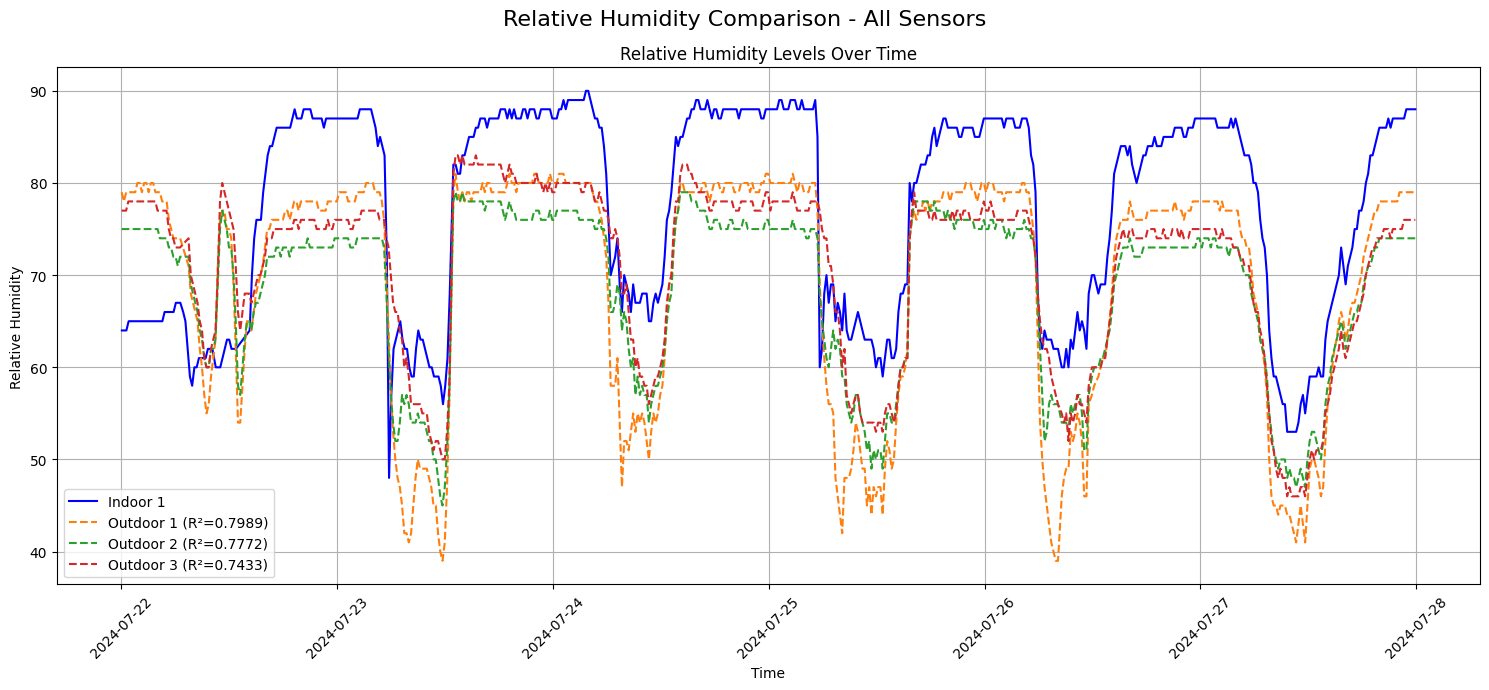

In [61]:
df_indoor = cleaned_sensor_dataframes[0] 

r2_values = []

# Iterate over the outdoor sensors
for i, df_outdoor in enumerate(cleaned_sensor_dataframes_outdoor):
    # Ensure that the dataframes are aligned and drop NaN values
    concatenated_df = pd.concat([df_indoor['Relative Humidity'].reset_index(drop=True), 
                                 df_outdoor['Relative Humidity'].reset_index(drop=True)], axis=1)
    concatenated_df.columns = [f'Relative Humidity_indoor', f'Relative Humidity_outdoor{i + 1}']
    
    # Drop rows with NaN values
    concatenated_df.dropna(inplace=True)

    # Calculate R² between the indoor and outdoor sensor
    if not concatenated_df.empty:
        r2_value = concatenated_df.corr().iloc[0, 1]
    else:
        r2_value = float('nan')  # Handle case where no data is available for calculation
    
    r2_values.append((f'indoor1', f'outdoor{i + 1}', r2_value))

# Plot PM 2.5 for all sensors on the same plot
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Relative Humidity Comparison - All Sensors", fontsize=16)

# Plot the indoor sensor's PM 2.5
ax.plot(df_indoor['Timestamp'], df_indoor['Relative Humidity'], label='Indoor 1', linestyle='-', color='blue')

# Plot each outdoor sensor's PM 2.5 with R² values
for i, df_outdoor in enumerate(cleaned_sensor_dataframes_outdoor):
    # Extract the corresponding R² value
    r2_value = r2_values[i][2]
    # Plot the outdoor sensor data
    ax.plot(df_outdoor['Timestamp'], df_outdoor['Relative Humidity'], 
            label=f'Outdoor {i + 1} (R²={r2_value:.4f})', linestyle='--', color=f'C{i + 1}')

# Customize plot
ax.set_title("Relative Humidity Levels Over Time")
ax.set_xlabel('Time')
ax.set_ylabel('Relative Humidity')
ax.legend()
ax.grid(True)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Box & Whisker

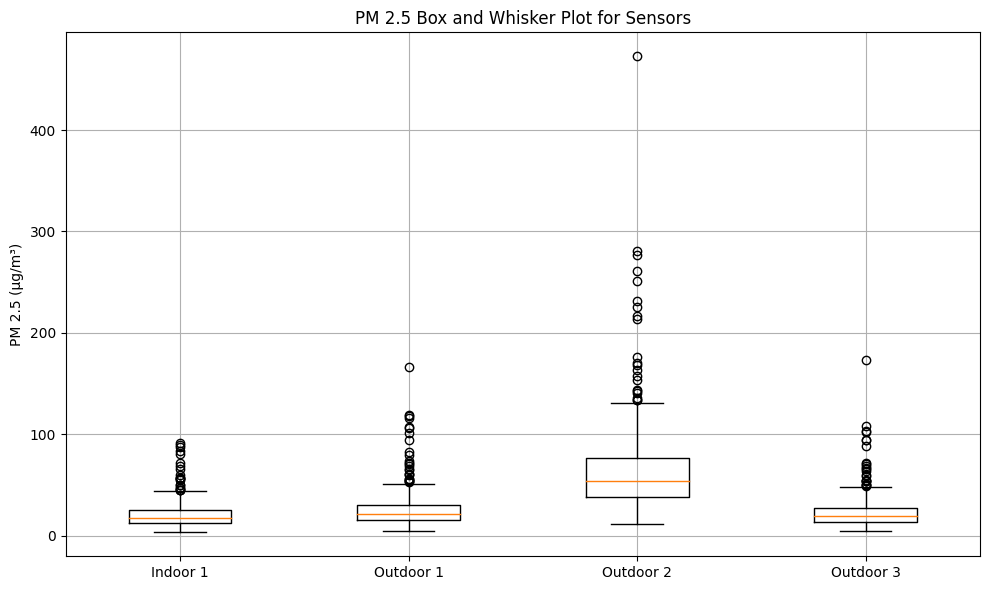

In [50]:
# Prepare data for box and whisker plots
all_data = [df_indoor['PM 2.5']]
all_data.extend([df_outdoor['PM 2.5'] for df_outdoor in cleaned_sensor_dataframes_outdoor])

# Plot the box and whisker plots
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(all_data, labels=['Indoor 1', 'Outdoor 1', 'Outdoor 2', 'Outdoor 3'])
ax.set_title('PM 2.5 Box and Whisker Plot for Sensors')
ax.set_ylabel('PM 2.5 (µg/m³)')
ax.grid(True)

plt.tight_layout()
plt.show()

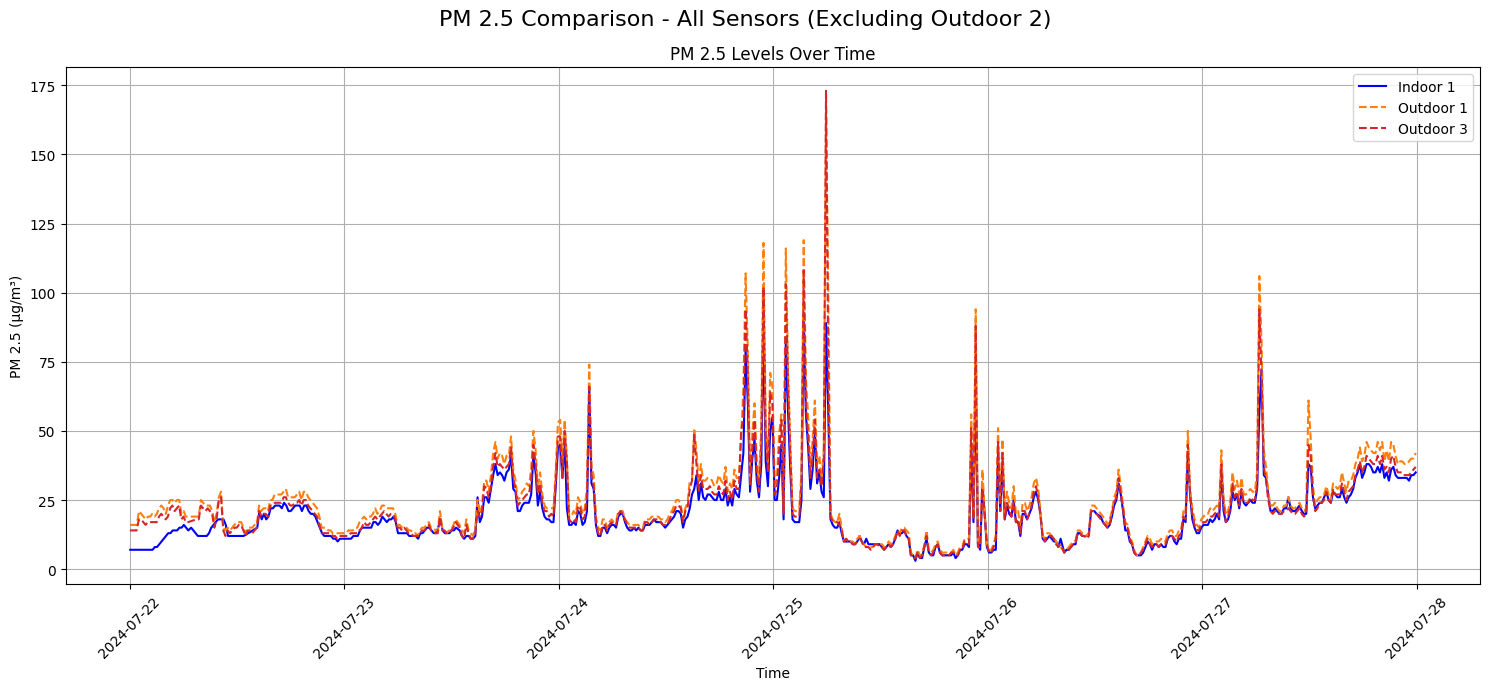

In [91]:
df_indoor = cleaned_sensor_dataframes[0] 

r2_values = []

# Iterate over the outdoor sensors, skipping outdoor2 (index 1)
for i, df_outdoor in enumerate(cleaned_sensor_dataframes_outdoor):
    if i == 1:  # Skip outdoor2 (index 1)
        continue
    
    # Ensure that the dataframes are aligned and drop NaN values
    concatenated_df = pd.concat([df_indoor['PM 2.5'].reset_index(drop=True), 
                                 df_outdoor['PM 2.5'].reset_index(drop=True)], axis=1)
    concatenated_df.columns = [f'PM 2.5_indoor', f'PM 2.5_outdoor{i + 1}']
    
    # Drop rows with NaN values
    concatenated_df.dropna(inplace=True)

    # Calculate R² between the indoor and outdoor sensor
    if not concatenated_df.empty:
        r2_value = concatenated_df.corr().iloc[1, 0]
    else:
        r2_value = float('nan')  # Handle case where no data is available for calculation
    
    r2_values.append((f'indoor1', f'outdoor{i + 1}', r2_value))

# Plot PM 2.5 for all sensors on the same plot
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("PM 2.5 Comparison - All Sensors (Excluding Outdoor 2)", fontsize=16)

# Plot the indoor sensor's PM 2.5
ax.plot(df_indoor['Timestamp'], df_indoor['PM 2.5'], label='Indoor 1', linestyle='-', color='blue')

# Plot each outdoor sensor's PM 2.5 with R² values, skipping outdoor2
for i, df_outdoor in enumerate(cleaned_sensor_dataframes_outdoor):
    if i == 1:  # Skip outdoor2
        continue
    # Extract the corresponding R² value
    r2_value = r2_values[i if i < 1 else i-1][2]  # Adjust index after skipping outdoor2
    # Plot the outdoor sensor data
    ax.plot(df_outdoor['Timestamp'], df_outdoor['PM 2.5'], 
            label=f'Outdoor {i + 1}', linestyle='--', color=f'C{i + 1}')

# Customize plot
ax.set_title("PM 2.5 Levels Over Time")
ax.set_xlabel('Time')
ax.set_ylabel('PM 2.5 (µg/m³)')
ax.legend()
ax.grid(True)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Harmonization

In [24]:
from sklearn.linear_model import LinearRegression

# Assign indoor and outdoor dataframes
df_indoor = cleaned_sensor_dataframes[0] 
sensor_dataframes = [df_indoor] + cleaned_sensor_dataframes_outdoor
sensor_names = ["Indoor1"] + [f"Outdoor{i+1}" for i in range(len(cleaned_sensor_dataframes_outdoor))]
column_name = "Temperature"

# Harmonization process
window_size = 10
cutoff_value = min(len(df) for df in sensor_dataframes)  # Use the shortest available length

# Aggregate sensor data
df = pd.concat([df[[column_name]].reset_index(drop=True) for df in sensor_dataframes], axis=1)
rolling_median = df.rolling(window=window_size, min_periods=1).median()
fitted_data_dict = {}
coefficients_data = []

def fit_sensor_to_median(x, y):
    lr = LinearRegression()
    lr.fit(x, y)
    return lr.coef_[0], lr.intercept_  # Return the coefficients and intercept

# Fit each sensor's data to the rolling median
for sensor_df, sensor_name in zip(sensor_dataframes, sensor_names):
    X = sensor_df[column_name].to_frame(name=column_name)[:cutoff_value]
    Y = rolling_median.median(axis=1).to_frame('median')[:cutoff_value]
    
    coefficients, intercept = fit_sensor_to_median(X, Y)
    fitted_data = X * coefficients + intercept
    fitted_data = fitted_data.values.flatten()
    fitted_data_dict[sensor_name] = fitted_data
    
    # Store coefficients and intercepts
    coefficients_data.append({
        'Sensor': sensor_name,
        'Coefficient': coefficients,
        'Intercept': intercept
    })

# Create DataFrame for coefficients
coefficients_df = pd.DataFrame(coefficients_data)

In [25]:
coefficients_df.to_csv('outdoor_temperature_parameters.csv', index=False)

## Apply Harmonization

In [24]:
import pandas as pd

# Load the harmonization parameters for each variable
temperature_params = pd.read_csv('../parameters/outdoor_temperature_parameters.csv')
humidity_params = pd.read_csv('../parameters/outdoor_humidity_parameters.csv')
pm25_params = pd.read_csv('../parameters/outdoor_pm2.5_parameters.csv')

# Ensure numerical types for coefficients and intercepts
for params_df in [temperature_params, humidity_params, pm25_params]:
    params_df['Coefficient'] = params_df['Coefficient'].astype(float)
    params_df['Intercept'] = params_df['Intercept'].astype(float)
    
# Function to apply harmonization using stored parameters
def apply_harmonization(sensor_df, sensor_name, params_df, column_name):
    params = params_df[params_df['Sensor'] == sensor_name]
    if not params.empty:
        coefficient = params['Coefficient'].values[0]
        intercept = params['Intercept'].values[0]
        sensor_df[column_name] = sensor_df[column_name] * coefficient + intercept
    return sensor_df

# Dictionary to store harmonized DataFrames separately
harmonized_dataframes = {}

# Apply harmonization to each outdoor sensor for all three variables
for sensor_df, sensor_name in zip(cleaned_sensor_dataframes_outdoor, pm25_params['Sensor'].tolist()):
    # Create a copy of the sensor DataFrame to avoid modifying the original
    harmonized_df = sensor_df.copy()
    
    # Apply harmonization for each variable
    harmonized_df = apply_harmonization(harmonized_df, sensor_name, pm25_params, "PM 2.5")
    harmonized_df = apply_harmonization(harmonized_df, sensor_name, temperature_params, "Temperature")
    harmonized_df = apply_harmonization(harmonized_df, sensor_name, humidity_params, "Relative Humidity")
    
    # Store the harmonized DataFrame
    harmonized_dataframes[sensor_name] = harmonized_df
    
    # Save each harmonized sensor's data separately
    harmonized_df.to_csv(f'../data/outdoor_harmonized/harmonized_{sensor_name}.csv', index=False)

## Plot

In [ ]:
import pandas as pd

# Function to read harmonized outdoor sensor data
def read_harmonized_data(file_prefix, num_sensors=3, folder_path="../data/outdoor_harmonized"):
    sensor_dataframes = []
    for i in range(1, num_sensors + 1):
        filename = f"{folder_path}/harmonized_{file_prefix}{i}.csv"  # Use file_prefix dynamically
        try:
            sensor_df = pd.read_csv(filename)
            sensor_dataframes.append(sensor_df)
        except FileNotFoundError:
            print(f"Warning: {filename} not found.")
    return sensor_dataframes

# Read harmonized outdoor sensor data
sensor_dataframes_outdoor = read_harmonized_data(file_prefix="Outdoor", num_sensors=3)

In [38]:
# Sensor names for mapping
sensor_names = ['outdoor01', 'outdoor02', 'outdoor03']
def clean_sensor_dataframes_outdoor(sensor_dataframes):
    numeric_columns = ['PM 1.0', 'PM 2.5', 'PM 4.0', 'PM 10',
                       'NC 0.5', 'NC 1.0', 'NC 2.5', 'NC 10',
                       'Temperature', 'Relative Humidity']
    cleaned_dataframes = []
    
    columns_not_present = list(set(numeric_columns) - set(sensor_dataframes[0].columns.to_list()))
    columns_present = [x for x in numeric_columns if x not in columns_not_present]

    print(f'Columns not present in the Dataframe: {columns_not_present}')

    for sensor_df in sensor_dataframes:
        # remove header
        sensor_df = sensor_df.iloc[1:]
        # Sort by 'Timestamp'
        sensor_df = sensor_df.sort_values(by=['Timestamp']).reset_index()
        # Change 'Timestamp' to date format
        sensor_df['Timestamp'] = pd.to_datetime(sensor_df['Timestamp'])
        # Convert specified columns to numeric
        set(columns_present) - set(sensor_dataframes[0].columns.to_list())
        
        sensor_df[columns_present] = sensor_df[columns_present].apply(pd.to_numeric, errors='coerce')
        # Append the cleaned DataFrame to the list
        cleaned_dataframes.append(sensor_df)
    return cleaned_dataframes
cleaned_sensor_dataframes_outdoor = clean_sensor_dataframes_outdoor(sensor_dataframes_outdoor)

Columns not present in the Dataframe: []


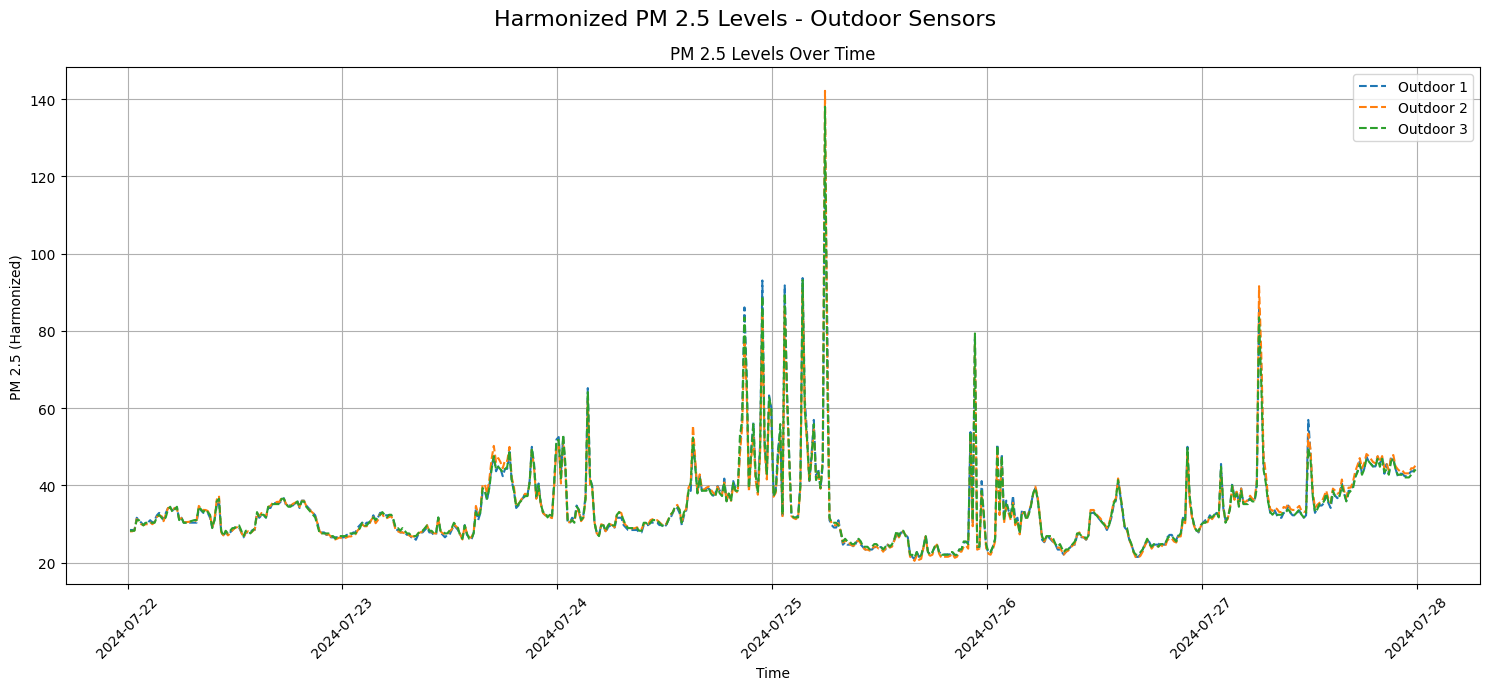

In [39]:
# Plot PM 2.5 data from all three sensors
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Harmonized PM 2.5 Levels - Outdoor Sensors", fontsize=16)

# Iterate through the sensor dataframes and plot
for i, sensor_df in enumerate(cleaned_sensor_dataframes_outdoor):
    if "Timestamp" in sensor_df.columns and "PM 2.5" in sensor_df.columns:
        ax.plot(sensor_df["Timestamp"], sensor_df["PM 2.5"], label=f"Outdoor {i+1}", linestyle="--")

# Customize the plot
ax.set_title("PM 2.5 Levels Over Time")
ax.set_xlabel("Time")
ax.set_ylabel("PM 2.5 (Harmonized)")
ax.legend()
ax.grid(True)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

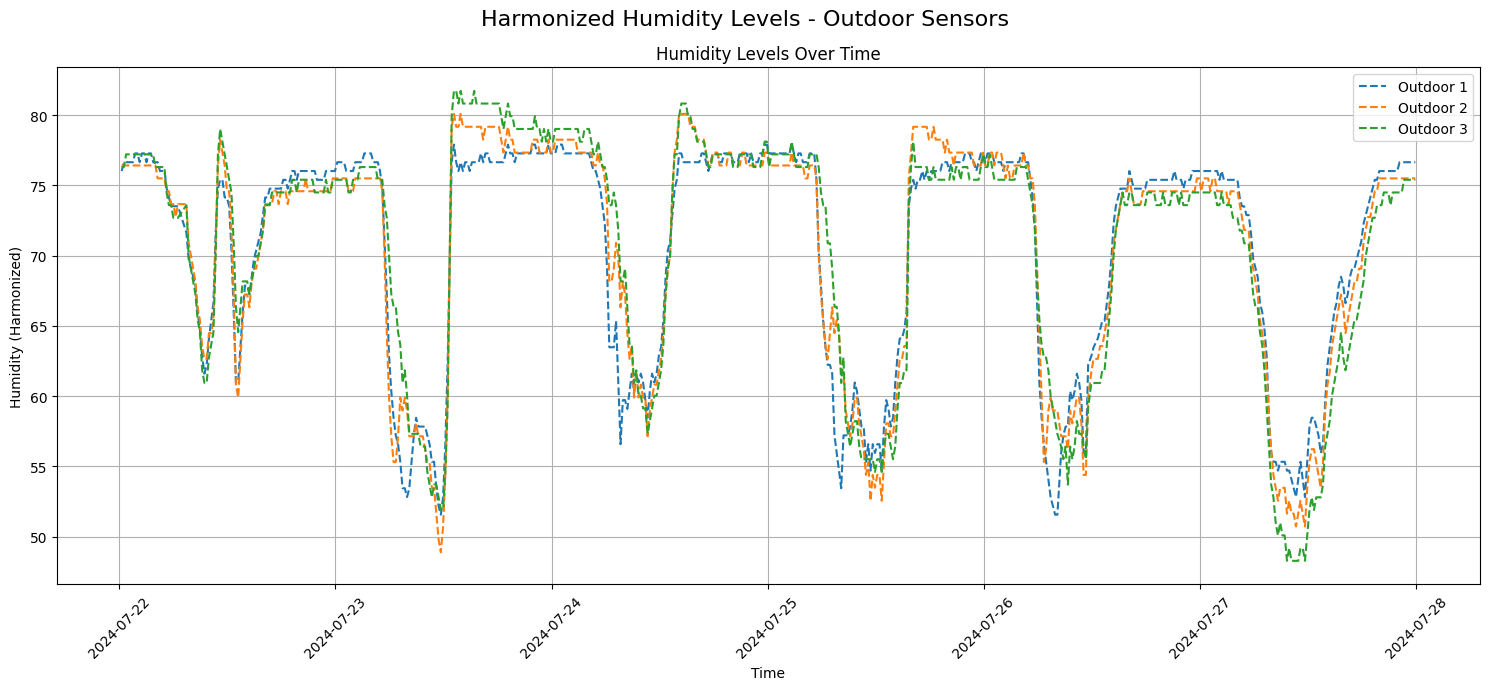

In [41]:
# Plot Temperature data from all three sensors
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle("Harmonized Humidity Levels - Outdoor Sensors", fontsize=16)

# Iterate through the sensor dataframes and plot
for i, sensor_df in enumerate(cleaned_sensor_dataframes_outdoor):
    if "Timestamp" in sensor_df.columns and "Relative Humidity" in sensor_df.columns:
        ax.plot(sensor_df["Timestamp"], sensor_df["Relative Humidity"], label=f"Outdoor {i+1}", linestyle="--")

# Customize the plot
ax.set_title("Humidity Levels Over Time")
ax.set_xlabel("Time")
ax.set_ylabel("Humidity (Harmonized)")
ax.legend()
ax.grid(True)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()